# Wstęp do uczenia maszynowego - laboratorium 7

### Przeuczenie i regularyzacja

#### Pytania kontrolne
1. Na czym polega uczenie (większości) modeli?
2. Na czym polega przeuczenie modelu?
3. Jaką znasz metodę walki z przeuczeniem modelu?
4. Jakie znasz rodzaje regularyzacji?
5. Czym różnią się od siebie poszczególne rodzaje regularyzacji?

#### Ćwiczenie
Załaduj dane dotyczące cukrzycy (`diabetes`) z `sklearn.datasets`. Dokonaj podziału na zbiór uczący i testowy.

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

### Ćwiczenie
Dopasuj model regresji liniowej do zbioru uczącego.

Sprawdź wartość MSE (odpowiedni import z `sklearn.metrics`) i R^2 (np. przez `model.score`) na zbiorze uczącym i testowym.


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model = LinearRegression(n_jobs=5)

model.fit(X=X_train, y=y_train)
y_pred = model.predict(X=X_test)

r2 = r2_score(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)

print(f'MSE: {mse}\nR2 score: {r2}')

MSE: 2821.750981001311
R2 score: 0.4772897164322617


### Ćwiczenie
Sprawdź, jakie wyniki MSE i R^2 uzyskasz dla regresji L2 (`Ridge`) i L1 (`Lasso`) i porównaj z regresją bez regularyzacji.

Zaimportuj odpowiednie klasy z `linear_model`. Użyj domyślnych wartości parametrów.


In [3]:
from sklearn.linear_model import Ridge, Lasso

L1 = Lasso(random_state=42)
L2 = Ridge(random_state=42)

models = [L1, L2]
for model in models:
    model.fit(X=X_train, y=y_train)
    y_pred = model.predict(X=X_test)
    r2 = r2_score(y_true=y_test, y_pred=y_pred)
    mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
    print(f'Model {model} | R2 score: {r2} | MSE: {mse}')

Model Lasso(random_state=42) | R2 score: 0.36189802861957876 | MSE: 3444.670824977634
Model Ridge(random_state=42) | R2 score: 0.4233440269603015 | MSE: 3112.9664151980814


### Ćwiczenie

Sprawdź, jakie wartości współczynników (`coef_`) modelu uzyskujesz dla poszczególnych modeli.

In [4]:
linear_coef = model.coef_
lasso_coef = L1.coef_
ridge_coef = L2.coef_

print(f'LinearRegression: {linear_coef}\n')
print(f'Lasso: {lasso_coef}\n')
print(f'Ridge: {ridge_coef}\n')

print(f'LinearRegression mean value: {linear_coef.mean()}')
print(f'Lasso mean value: {lasso_coef.mean()}')
print(f'Ridge mean value: {ridge_coef.mean()}')

LinearRegression: [  45.05421022  -71.94739737  280.71625182  195.21266175   -2.22930269
  -17.54079744 -148.68886188  120.46723979  198.61440137  106.93469215]

Lasso: [  0.          -0.         443.7033885   51.60109433   0.
   0.          -0.           0.         201.96647823   0.        ]

Ridge: [  45.05421022  -71.94739737  280.71625182  195.21266175   -2.22930269
  -17.54079744 -148.68886188  120.46723979  198.61440137  106.93469215]

LinearRegression mean value: 70.65930977099383
Lasso mean value: 69.72709610644716
Ridge mean value: 70.65930977099383


### Ćwiczenie
Sprawdź w dokumentacji `Ridge` i `Lasso`, który parametr odpowiada za "siłę" regularyzacji (i jak go interpretować).

Wykorzystaj technikę Grid Search (https://scikit-learn.org/stable/modules/grid_search.html) do znalezienia wartości tego parametru dających najlepsze wyniki dla regularyzacji L2 i L1.

Ustaw odpowiednio wartości parametrów:
- `param_grid` - sprawdź zakres zmienności parametru od 0.01 do 1 (hint: wykorzystaj `np.linspace()` lub `np.logspace()`)
- `scoring` - na podst. (https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules)
- `cv` ustaw wedle uznania np. na 5 lub 10 - będzie to miało niewielki wpływ na wyniki

In [5]:
import numpy as np

from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': np.linspace(start=0.01, stop=1.0)}

estimators = [L1, L2]
for estimator in estimators:
    grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X=X_train, y=y_train)
    print(f'{estimator} best alpha value: {grid_search.best_params_}')
    print(f'{estimator} best score: {grid_search.best_score_}')

Lasso(random_state=42) best alpha value: {'alpha': 0.01}
Lasso(random_state=42) best score: -3171.1972090165345
Ridge(random_state=42) best alpha value: {'alpha': 0.01}
Ridge(random_state=42) best score: -3169.973004338214


### Ćwiczenie

Porównaj MSE i R^2 na zbiorze uczącym i testowym dla modeli z regularyzacją L2 i L1 (podając znalezione powyżej wartości parametru `alpha`) z modelem regresji liniowej bez regularyzacji.

In [6]:
L1 = Lasso(random_state=42); L1_reg = Lasso(alpha=0.01, random_state=42)
L2 = Ridge(random_state=42); L2_reg = Ridge(alpha=0.01, random_state=42)

models = [L1, L1_reg, L2, L2_reg]
for model in models:
    model.fit(X=X_train, y=y_train)
    y_pred = model.predict(X=X_test)
    mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
    r2 = r2_score(y_true=y_test, y_pred=y_pred)
    print(f'{model}: MSE: {mse} | R2 score: {r2}')

Lasso(random_state=42): MSE: 3444.670824977634 | R2 score: 0.36189802861957876
Lasso(alpha=0.01, random_state=42): MSE: 2814.060704553208 | R2 score: 0.47871428812904404
Ridge(random_state=42): MSE: 3112.9664151980814 | R2 score: 0.4233440269603015
Ridge(alpha=0.01, random_state=42): MSE: 2819.688330911985 | R2 score: 0.4776718084100272


### Ćwiczenie

Sprawdź, jakie wartości współczynników (`coef_`) modelu uzyskujesz dla poszczególnych rodzajów regularyzacji przy odpowiednio dobranych wartościach parametru `alpha`. Co się zmieniło względem poprzedniego ćwiczenia?

In [7]:
lasso_coef_reg = L1_reg.coef_
ridge_coef_reg = L2_reg.coef_

print(f'Lasso: {lasso_coef_reg}\n')
print(f'Ridge: {ridge_coef_reg}\n')

print(f'Lasso mean value: {lasso_coef_reg.mean()}')
print(f'Ridge mean value: {ridge_coef_reg.mean()}')

Lasso: [  28.24636424 -250.8191835   556.21587371  380.65950187 -468.73953985
  166.99341683  -60.21945923  230.91625298  492.63435849   43.96934558]

Ridge: [  34.16732784 -254.04331602  550.84488152  379.12670807 -404.25326283
  123.02921897  -99.04167392  215.03262419  463.84263427   50.35149031]

Lasso mean value: 111.98569311207548
Ridge mean value: 105.90566323937182


### Ćwiczenie
Zajrzyj do dokumentacji sklearn dla modelu regresji **logistycznej** i odszukaj dwa parametry odpowiedzialne za regularyzację.

Zwróć uwagę na ich domyślne wartości.

- penalty (default 'l2')
- C (default '1.0')

### Ćwiczenie

Przeanalizuj poniższe przykłady z dokumentacji sklearn:
- przeklejając i uruchamiając ich kod w poniższej komórce  
lub
- klikając "launch binder" na dole strony sklearn

1. https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html
2. https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_l1_l2_sparsity.html
3. https://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html

Wyciągnij wnioski i przedyskutuj w grupie.

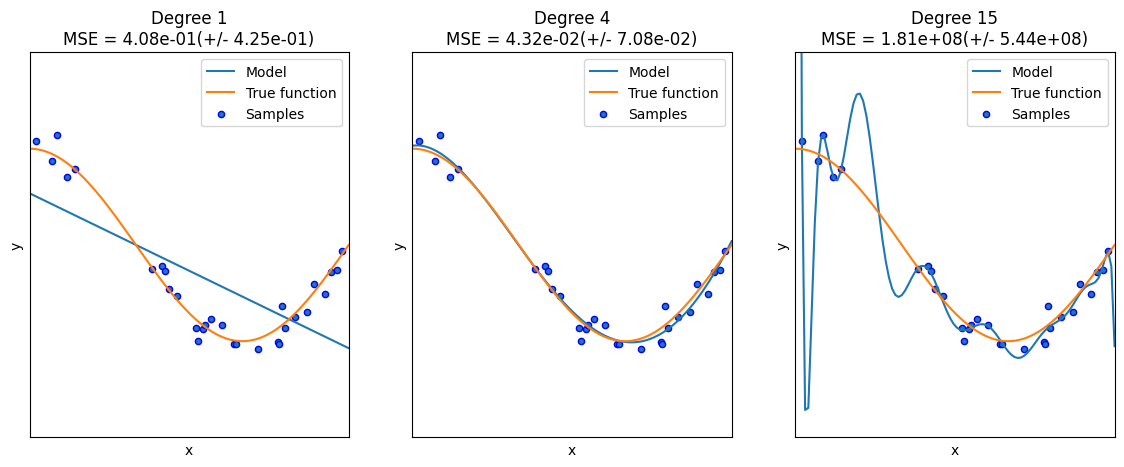

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

C=1.00
Sparsity with L1 penalty:                4.69%
Sparsity with Elastic-Net penalty:       4.69%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.10
Sparsity with L1 penalty:                29.69%
Sparsity with Elastic-Net penalty:       12.50%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.01
Sparsity with L1 penalty:                84.38%
Sparsity with Elastic-Net penalty:       65.62%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.86
Score with Elastic-Net penalty:          0.88
Score with L2 penalty:                   0.89


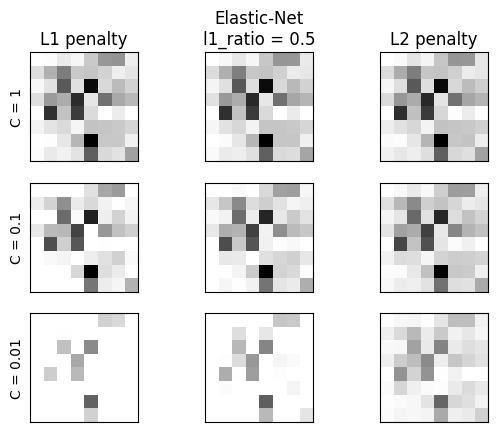

In [9]:
# Authors: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Andreas Mueller <amueller@ais.uni-bonn.de>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X, y = datasets.load_digits(return_X_y=True)

X = StandardScaler().fit_transform(X)

# classify small against large digits
y = (y > 4).astype(int)

l1_ratio = 0.5  # L1 weight in the Elastic-Net regularization

fig, axes = plt.subplots(3, 3)

# Set regularization parameter
for i, (C, axes_row) in enumerate(zip((1, 0.1, 0.01), axes)):
    # Increase tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty="l1", tol=0.01, solver="saga")
    clf_l2_LR = LogisticRegression(C=C, penalty="l2", tol=0.01, solver="saga")
    clf_en_LR = LogisticRegression(
        C=C, penalty="elasticnet", solver="saga", l1_ratio=l1_ratio, tol=0.01
    )
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)
    clf_en_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0) * 100

    print("C=%.2f" % C)
    print("{:<40} {:.2f}%".format("Sparsity with L1 penalty:", sparsity_l1_LR))
    print("{:<40} {:.2f}%".format("Sparsity with Elastic-Net penalty:", sparsity_en_LR))
    print("{:<40} {:.2f}%".format("Sparsity with L2 penalty:", sparsity_l2_LR))
    print("{:<40} {:.2f}".format("Score with L1 penalty:", clf_l1_LR.score(X, y)))
    print(
        "{:<40} {:.2f}".format("Score with Elastic-Net penalty:", clf_en_LR.score(X, y))
    )
    print("{:<40} {:.2f}".format("Score with L2 penalty:", clf_l2_LR.score(X, y)))

    if i == 0:
        axes_row[0].set_title("L1 penalty")
        axes_row[1].set_title("Elastic-Net\nl1_ratio = %s" % l1_ratio)
        axes_row[2].set_title("L2 penalty")

    for ax, coefs in zip(axes_row, [coef_l1_LR, coef_en_LR, coef_l2_LR]):
        ax.imshow(
            np.abs(coefs.reshape(8, 8)),
            interpolation="nearest",
            cmap="binary",
            vmax=1,
            vmin=0,
        )
        ax.set_xticks(())
        ax.set_yticks(())

    axes_row[0].set_ylabel("C = %s" % C)

plt.show()

In [10]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

X, y = datasets.load_diabetes(return_X_y=True)
X = X[:150]
y = y[:150]

lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{"alpha": alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

(0.0001, 0.31622776601683794)

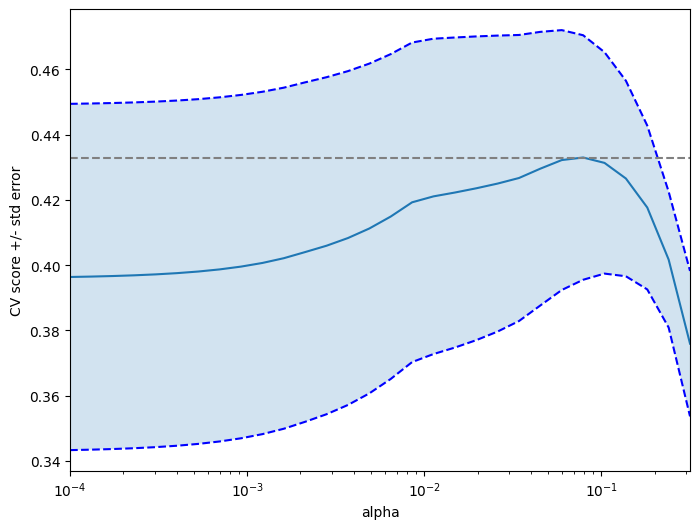

In [11]:
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("CV score +/- std error")
plt.xlabel("alpha")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xlim([alphas[0], alphas[-1]])

In [12]:
# To answer this question we use the LassoCV object that sets its alpha
# parameter automatically from the data by internal cross-validation (i.e. it
# performs cross-validation on the training data it receives).
# We use external cross-validation to see how much the automatically obtained
# alphas differ across different cross-validation folds.

from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold

lasso_cv = LassoCV(alphas=alphas, random_state=0, max_iter=10000)
k_fold = KFold(3)

print("Answer to the bonus question:", "how much can you trust the selection of alpha?")
print()
print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k, (train, test) in enumerate(k_fold.split(X, y)):
    lasso_cv.fit(X[train], y[train])
    print(
        "[fold {0}] alpha: {1:.5f}, score: {2:.5f}".format(
            k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])
        )
    )
print()
print("Answer: Not very much since we obtained different alphas for different")
print("subsets of the data and moreover, the scores for these alphas differ")
print("quite substantially.")

plt.show()

Answer to the bonus question: how much can you trust the selection of alpha?

Alpha parameters maximising the generalization score on different
subsets of the data:
[fold 0] alpha: 0.05968, score: 0.54209
[fold 1] alpha: 0.04520, score: 0.15521
[fold 2] alpha: 0.07880, score: 0.45192

Answer: Not very much since we obtained different alphas for different
subsets of the data and moreover, the scores for these alphas differ
quite substantially.
